## <center>EXPLORATORY DATA ANALYSIS</center>

In [1]:
#importing required libraries
import numpy as np                                              
import pandas as pd                                             
import matplotlib.pyplot as plt                              
import seaborn as sns 

#to filter out warnings
import warnings                                                  
warnings.simplefilter(action='ignore')

In [2]:
#importing the dataset
df1 = pd.read_csv('C:/Users/Harshita/Desktop/Datasets/Power consumption - statewise.csv',parse_dates=['Unnamed: 0'])
df1 = df1.rename(columns={'Unnamed: 0': 'Dates'})
df1.head() 

,Dates,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-02-01,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-03-01,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-04-01,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-05-01,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-06-01,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [3]:
#importing the dataset
df2 = pd.read_csv('C:/Users/Harshita/Desktop/Datasets/Power - Merged data.csv',parse_dates=['Dates'])
df2.head()

,States,latitude,longitude,Dates,Usage
0,Punjab,31.519974,75.980003,2019-02-01,119.9
1,Haryana,28.450006,77.019991,2019-02-01,130.3
2,Rajasthan,26.449999,74.639981,2019-02-01,234.1
3,Delhi,28.669993,77.230004,2019-02-01,85.8
4,UP,27.599981,78.050006,2019-02-01,313.9


### Preprocessing the Data

In [4]:
df2 = df2.drop(['latitude','longitude'], axis=1)

In [5]:
df2.head()

,States,Dates,Usage
0,Punjab,2019-02-01,119.9
1,Haryana,2019-02-01,130.3
2,Rajasthan,2019-02-01,234.1
3,Delhi,2019-02-01,85.8
4,UP,2019-02-01,313.9


### Visualising the relevant features

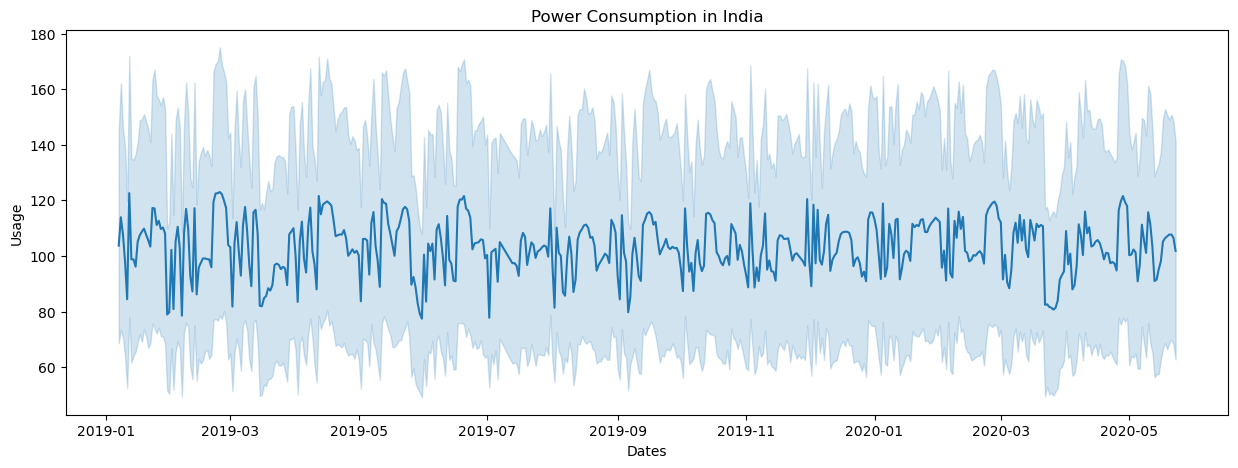

In [6]:
plt.figure(figsize=(15,5))
plt.title("Power Consumption in India")
sns.lineplot(data = df2, x = "Dates" , y = "Usage")
plt.show()

In [7]:
df_merged = df2.groupby('States')['Usage'].sum()
df_merged = df_merged.reset_index()
df_merged = df_merged.sort_values('Usage',ascending = False)

In [8]:
df_merged

,States,Usage
17,Maharashtra,217079.8
9,Gujarat,162488.9
30,UP,157960.3
27,Tamil Nadu,151271.5
25,Rajasthan,109877.0
16,MP,104766.4
14,Karnataka,102665.7
28,Telangana,94065.3
0,Andhra Pradesh,88604.4
24,Punjab,70996.2


[Text(0, 0, 'Maharashtra'),
 Text(1, 0, 'Gujarat'),
 Text(2, 0, 'UP'),
 Text(3, 0, 'Tamil Nadu'),
 Text(4, 0, 'Rajasthan'),
 Text(5, 0, 'MP'),
 Text(6, 0, 'Karnataka'),
 Text(7, 0, 'Telangana'),
 Text(8, 0, 'Andhra Pradesh'),
 Text(9, 0, 'Punjab')]

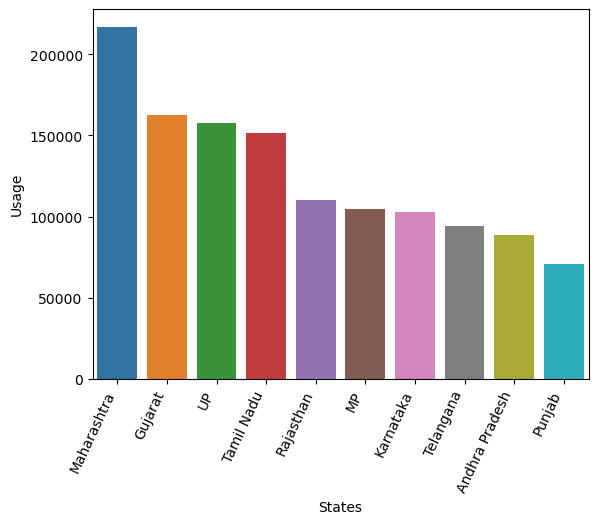

In [9]:
ax=sns.barplot(x="States", y="Usage", data = df_merged.head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

In [10]:
df1['North Region'] = df1['Punjab']+ df1['Haryana']+ df1['Rajasthan']+ df1['Delhi']+df1['UP']+df1['Uttarakhand']+df1['HP']+df1['J&K']+df1['Chandigarh']
df1['West Region'] = df1['Chhattisgarh']+df1['Gujarat']+df1['MP']+df1['Maharashtra']+df1['Goa']+df1['DNH']
df1['South Region'] = df1['Andhra Pradesh']+df1['Telangana']+df1['Karnataka']+df1['Kerala']+df1['Tamil Nadu']+df1['Pondy']
df1['East Region'] = df1['Bihar']+df1['Jharkhand']+ df1['Odisha']+df1['West Bengal']+df1['Sikkim']
df1['Northeastern Region'] =df1['Arunachal Pradesh']+df1['Assam']+df1['Manipur']+df1['Meghalaya']+df1['Mizoram']+df1['Nagaland']+df1['Tripura']

In [11]:
df1.head()

,Dates,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,North Region,West Region,South Region,East Region,Northeastern Region
0,2019-02-01,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,2.7,6.1,1.9,2.2,3.4,1012.2,1111.2,922.4,287.5,40.1
1,2019-03-01,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,2.4,6.5,1.8,2.2,3.6,1021.3,1100.6,952.1,287.6,42.1
2,2019-04-01,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,2.4,6.3,1.7,2.2,3.5,1017.2,1041.1,921.8,284.0,40.0
3,2019-05-01,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,2.7,5.7,1.8,2.3,3.5,991.0,1052.1,950.3,274.8,40.7
4,2019-06-01,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,2.7,6.2,1.9,2.3,3.3,985.5,1056.3,964.5,270.3,40.3


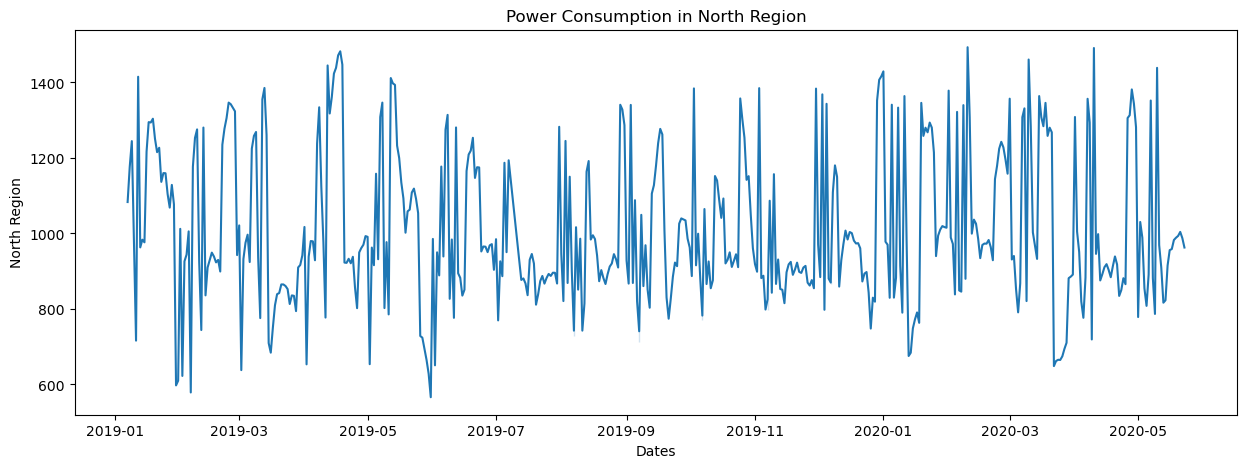

In [12]:
plt.figure(figsize=(15,5))
plt.title("Power Consumption in North Region")
sns.lineplot(data = df1, x = "Dates" , y = "North Region")
plt.show()

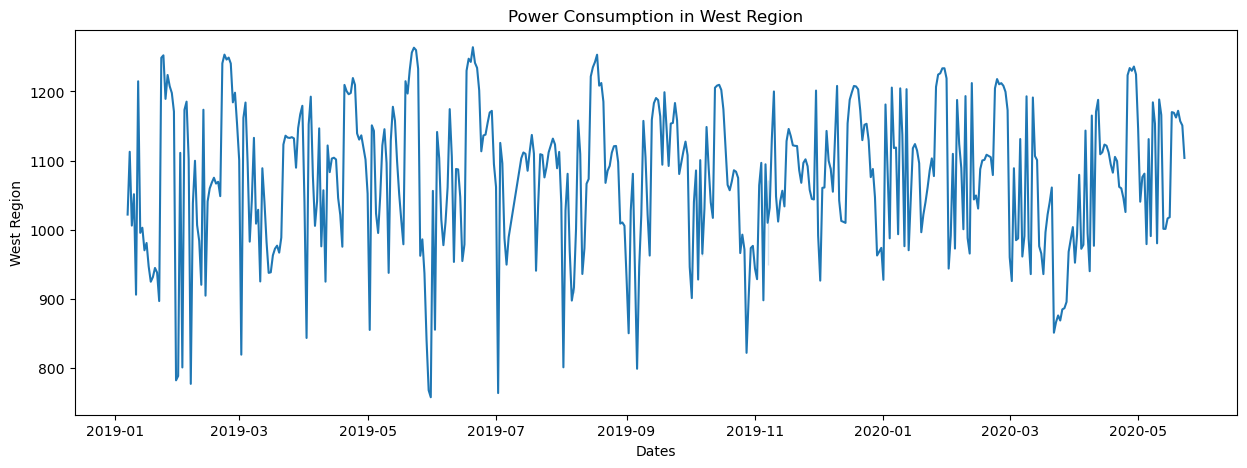

In [13]:
plt.figure(figsize=(15,5))
plt.title("Power Consumption in West Region")
sns.lineplot(data = df1, x = "Dates" , y = "West Region")
plt.show()

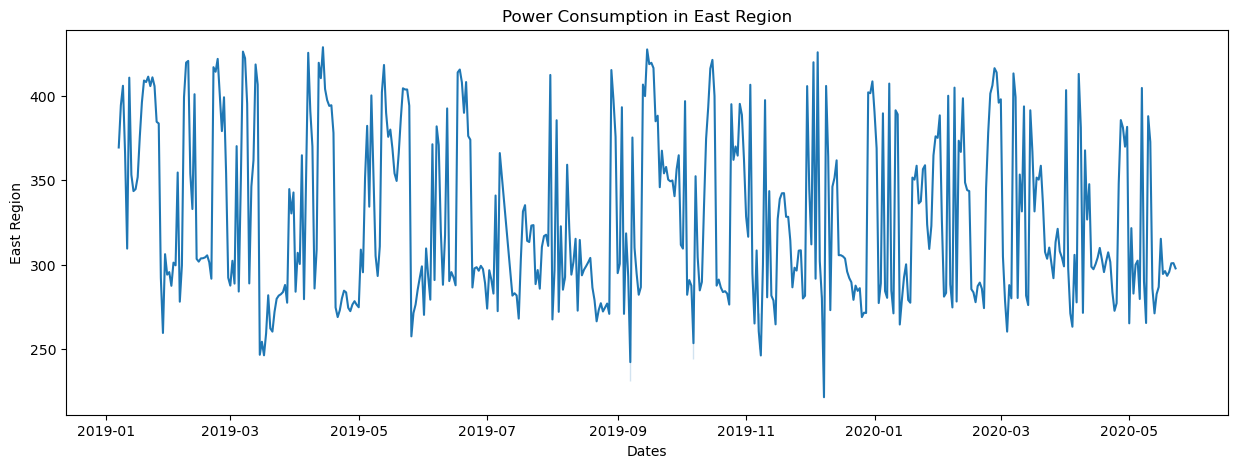

In [14]:
plt.figure(figsize=(15,5))
plt.title("Power Consumption in East Region")
sns.lineplot(data = df1, x = "Dates" , y = "East Region")
plt.show()

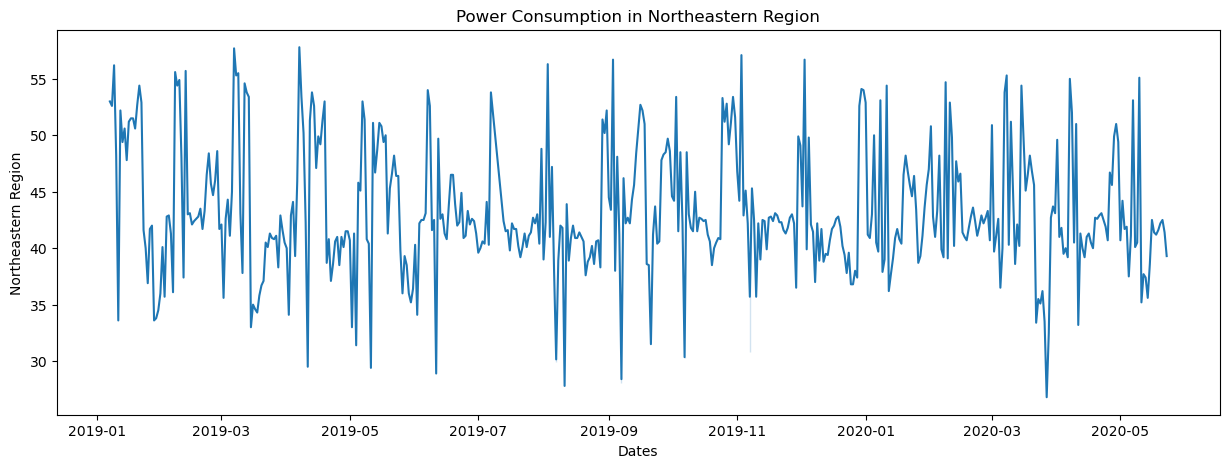

In [15]:
plt.figure(figsize=(15,5))
plt.title("Power Consumption in Northeastern Region")
sns.lineplot(data = df1, x = "Dates" , y = "Northeastern Region")
plt.show()

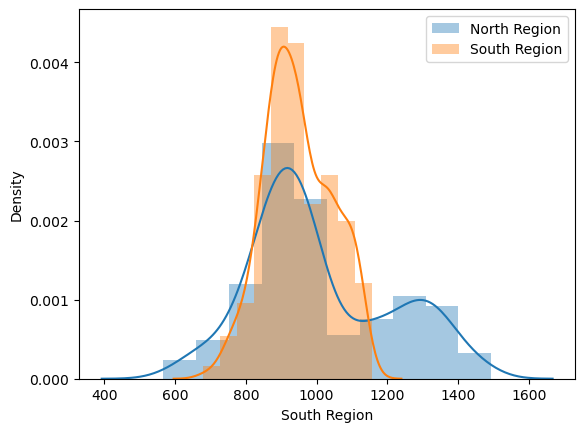

In [16]:
sns.distplot(df1["North Region"], bins=10,label="North Region")
sns.distplot(df1["South Region"], bins=10,label="South Region")
plt.legend()
plt.show()

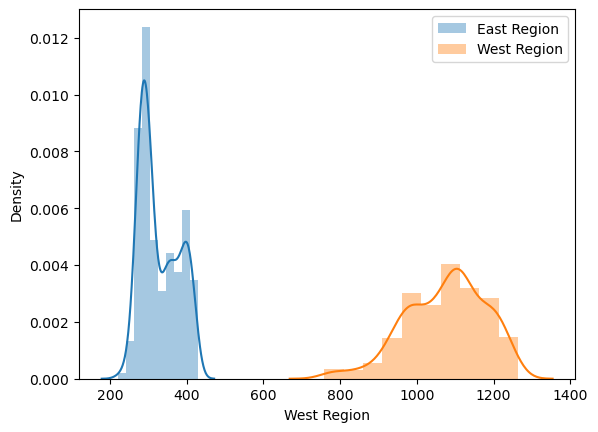

In [17]:
sns.distplot(df1["East Region"], bins=10,label="East Region")
sns.distplot(df1["West Region"], bins=10,label="West Region")
plt.legend()
plt.show()

<AxesSubplot:>

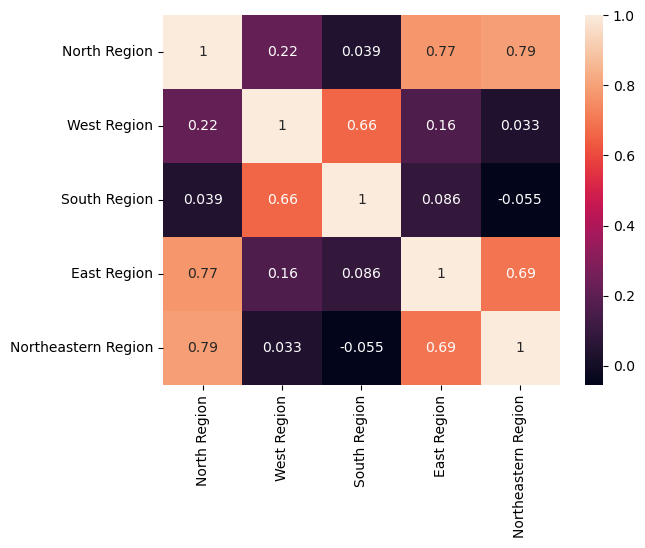

In [18]:
sns.heatmap(df1.iloc[:, -5:].corr(),annot=True)